 (ii) Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load dataset
df = pd.read_csv("Housing.csv")

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [4]:
# Step 3: Encode categorical features for analysis
df_encoded = df.copy()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded[categorical_cols] = df_encoded[categorical_cols].apply(lambda col: pd.factorize(col)[0])

In [6]:
type(df)  #data type

pandas.core.frame.DataFrame

In [8]:
df.shape # check dimension

(545, 13)

In [10]:
# Step 3: Check for missing values
df.isnull().sum()

,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [12]:
df = pd.read_csv("Housing.csv")

In [14]:
#Show me the locations where the null values are
df[df.isnull().any(axis=1)]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['area']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'area'}, axis=1)
              .sort_values('area', ascending=True))
  xs = counted['area']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('area')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['bedrooms']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'bedrooms'}, axis=1)
              .sort_values('bedrooms', ascending=True))
  xs = counted['bedrooms']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('bedrooms', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bedrooms')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['bathrooms']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'bathrooms'}, axis=1)
              .sort_values('bathrooms', ascending=True))
  xs = counted['bathrooms']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('bathrooms', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bathrooms')
_ = plt.ylabel('count()')

In [16]:
# Dropping those records having null values
df = df.dropna()

In [18]:
# Dropping those records having null values
df = df.dropna()

# Check for nulls in the cleaned dataframe
df.isnull().sum()

,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [20]:
# printing the shape -- Yes, 15 rows containing null values are removed
df.shape

(545, 13)

In [22]:
df.dtypes  # checking the data type of every column

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object
parking,int64


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


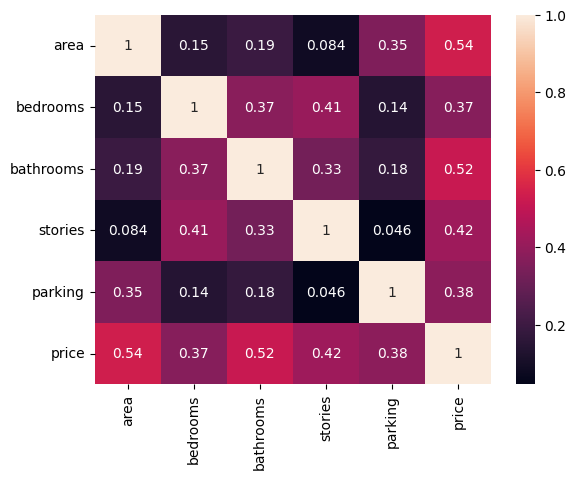

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix for numerical columns
%time
# Use the correct DataFrame name 'df' instead of 'dataTrain'
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [1]:
!pip install fireducks # optional for the assignment

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


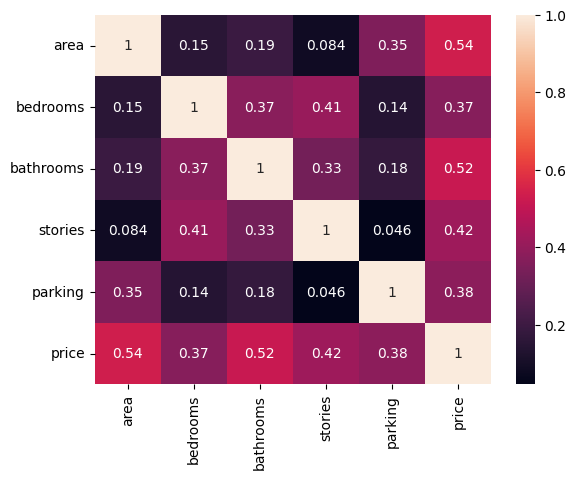

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd
 #importing the pandas module that is found inside the fireducks library.
 # FireDucks is a DataFrame library specifically designed to accelerate pandas operations

#Load the data
# Changed the filename from '/content/data_train.csv' to 'Housing.csv'
dataTrain_fd = pd.read_csv("Housing.csv")
dataTrain_fd = dataTrain_fd.dropna()

%time
corr = dataTrain_fd.select_dtypes(include=['number']).corr() #find corr

# Plot the heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

plt.show()

In [6]:
dataTrain_fd.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [8]:
#Search for price = 1 , if so, change the price to 500
# Corrected the variable name to dataTrain_fd and the column name to price
dataTrain_fd.loc[dataTrain_fd['price'] == 1, 'price'] = 500

In [11]:
dataTrain_fd.describe()  # now still the minimum price is 1.42 USD

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [13]:
#Search for price < 500 , if so, change the price to 500
# Corrected the variable name to dataTrain_fd and the column name to price
dataTrain_fd.loc[dataTrain_fd['price'] < 500, 'price'] = 500

In [15]:
dataTrain_fd.describe()  # now the minimum price is 500 USD

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


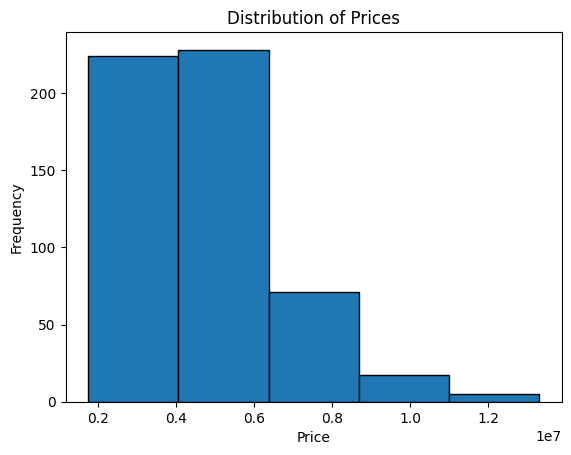

In [17]:
import matplotlib.pyplot as plt

# Corrected the variable name to dataTrain_fd and the column name to price
dataTrain_fd['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [19]:
dataTrain_fd.describe(include = 'object') #summary statistics for categorical values

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [20]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="odometer_value", y="price_usd", data=dataTrain)

NameError: name 'dataTrain' is not defined

<Figure size 1000x600 with 0 Axes>

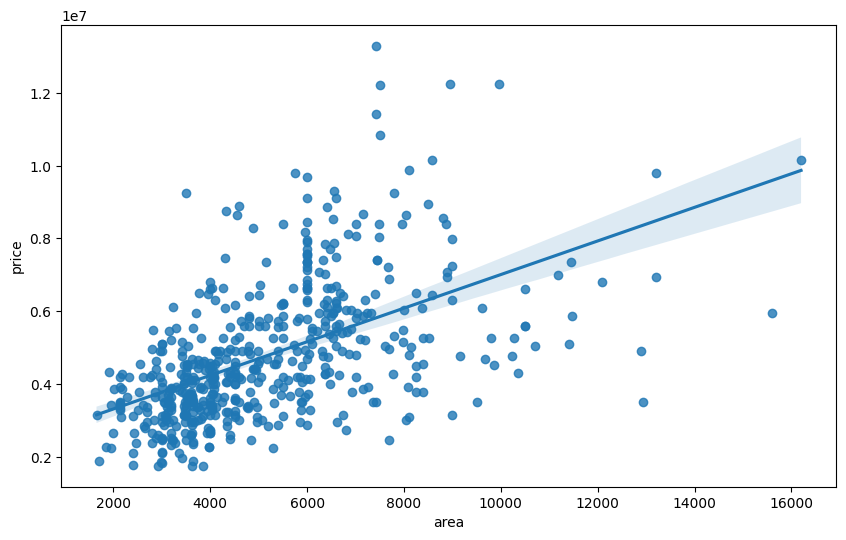

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt # Ensure plt is imported if not already

plt.figure(figsize=(10,6))
# Corrected the variable name from dataTrain to dataTrain_fd
# Corrected column names to 'area' and 'price' based on the 'Housing.csv' dataset
sns.regplot(x="area", y="price", data=dataTrain_fd)
plt.show() # Added plt.show() to display the plot

In [24]:
from scipy import stats

# Use dataTrain_fd and the correct column names 'area' and 'price'
pearson_coef, p_value = stats.pearsonr(dataTrain_fd['area'], dataTrain_fd['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5359973457780801  with a P-value of P = 7.388225401521693e-42


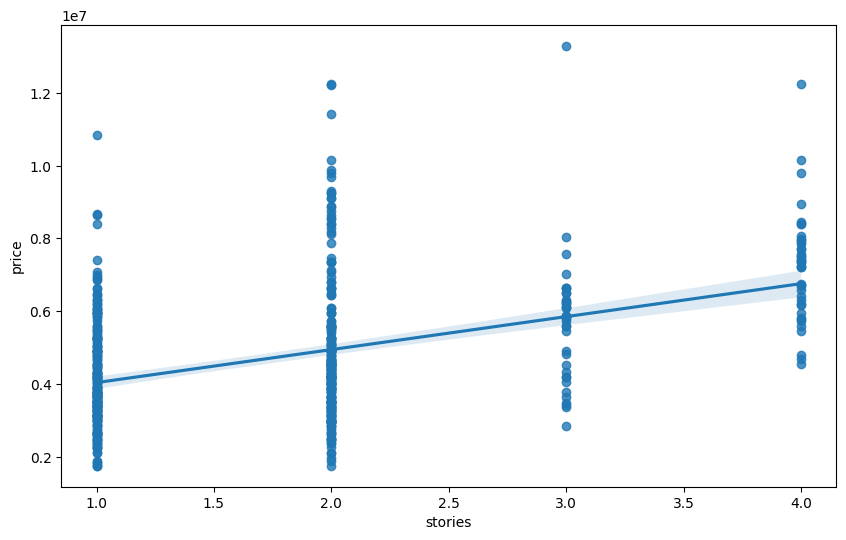

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Corrected the variable name to dataTrain_fd
# Changed column names from 'year_produced' and 'price_usd' to 'stories' and 'price'
sns.regplot(x="stories", y="price", data=dataTrain_fd)
plt.show()

In [28]:
# Corrected the variable name from dataTrain to dataTrain_fd
# Changed column names from 'year_produced' and 'price_usd' to 'stories' and 'price'
pearson_coef, p_value = stats.pearsonr(dataTrain_fd['stories'], dataTrain_fd['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.42071236618861674  with a P-value of P = 8.668397383952709e-25


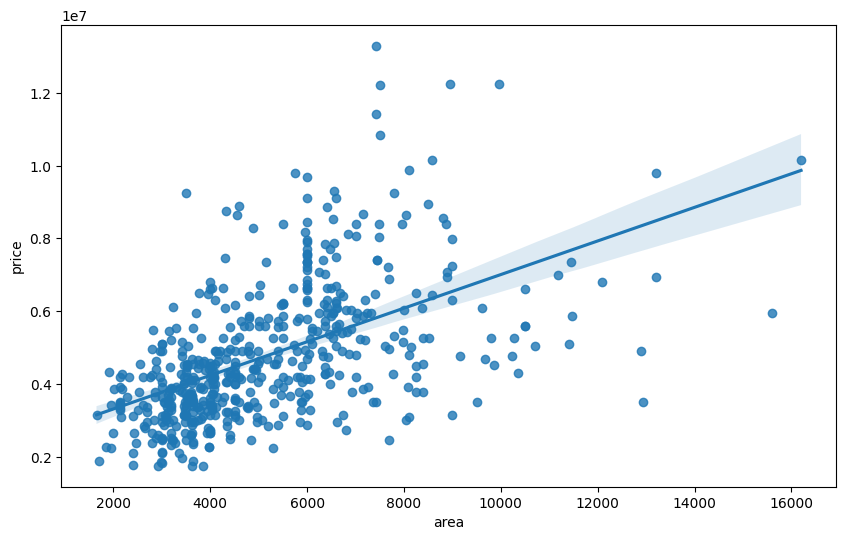

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Corrected the variable name from dataTrain to dataTrain_fd
# Changed column names from 'engine_capacity' and 'price_usd' to 'area' and 'price'
sns.regplot(x="area", y="price", data=dataTrain_fd)
plt.show() # Added plt.show() to display the plot

In [32]:
# Corrected the variable name from dataTrain to dataTrain_fd
# Changed column names from 'engine_capacity' and 'price_usd' to 'area' and 'price'
pearson_coef, p_value = stats.pearsonr(dataTrain_fd['area'], dataTrain_fd['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5359973457780801  with a P-value of P = 7.388225401521693e-42


In [ ]:
# Step 7: Pearson Correlation
print("Pearson Correlation Coefficient & p-values:")
target = 'price'
for feature in df_encoded.columns.drop(target):
    corr, p = pearsonr(df_encoded[feature], df_encoded[target])
    print(f"{feature:20s} | Correlation: {corr:.3f} | p-value: {p:.5f}")

Pearson Correlation Coefficient & p-values:
area                 | Correlation: 0.536 | p-value: 0.00000
bedrooms             | Correlation: 0.366 | p-value: 0.00000
bathrooms            | Correlation: 0.518 | p-value: 0.00000
stories              | Correlation: 0.421 | p-value: 0.00000
mainroad             | Correlation: -0.297 | p-value: 0.00000
guestroom            | Correlation: 0.256 | p-value: 0.00000
basement             | Correlation: 0.187 | p-value: 0.00001
hotwaterheating      | Correlation: 0.093 | p-value: 0.02982
airconditioning      | Correlation: -0.453 | p-value: 0.00000
parking              | Correlation: 0.384 | p-value: 0.00000
prefarea             | Correlation: -0.330 | p-value: 0.00000
furnishingstatus     | Correlation: -0.305 | p-value: 0.00000


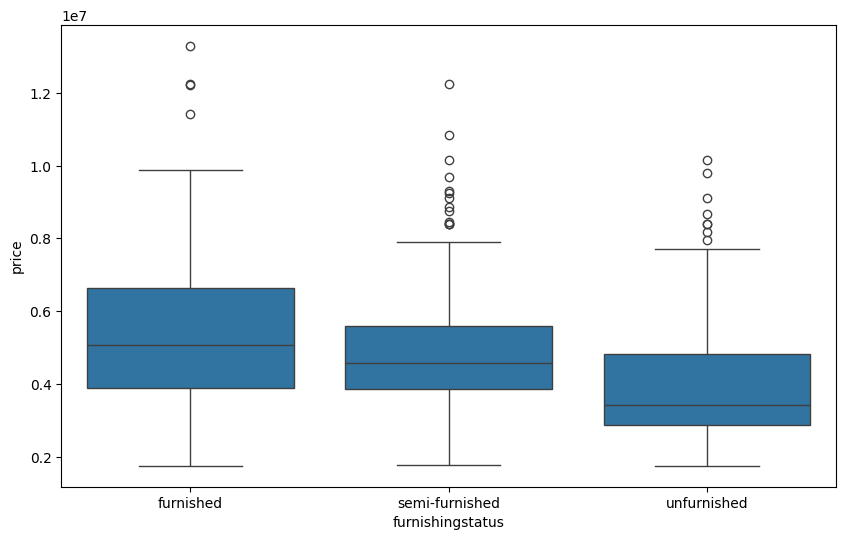

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected the variable name from dataTrain to dataTrain_fd
# Changed column names to a categorical feature ('furnishingstatus') and the target variable ('price')
plt.figure(figsize=(10,6))
sns.boxplot(x="furnishingstatus", y="price", data=dataTrain_fd)
plt.show()

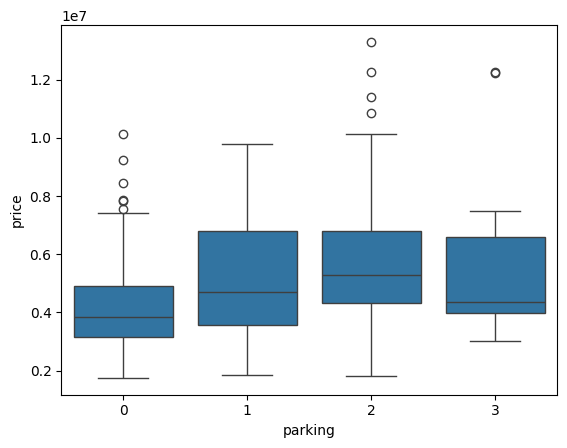

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="parking", y="price", data=dataTrain_fd)
plt.show() # Ensure the plot is displayed

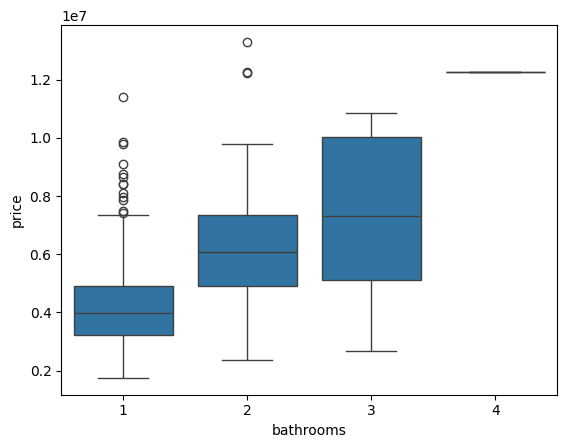

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="bathrooms", y="price", data=dataTrain_fd)
plt.show() # Ensure the plot is displayed

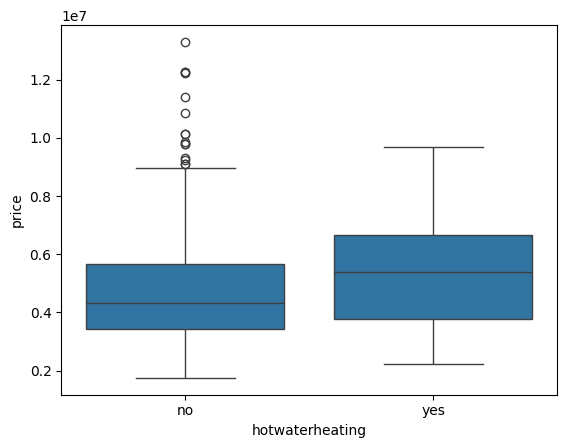

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="hotwaterheating", y="price", data=dataTrain_fd)
plt.show() # Ensure the plot is displayed

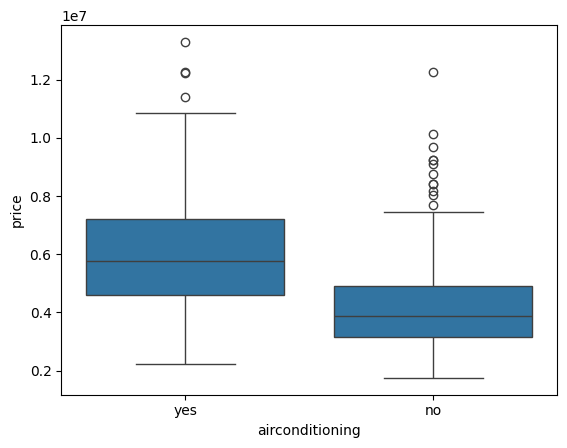

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="airconditioning", y="price", data=dataTrain_fd)
plt.show() # Ensure the plot is displayed

(iii) Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Handle missing values (not necessary here as dataset is clean)
print(df.isnull().sum())

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [ ]:
# Step 2: Outlier Removal using IQR (for 'price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Step 3: Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Step 4: Normalization
scaler = MinMaxScaler()
numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df[numerical] = scaler.fit_transform(df[numerical])

In [ ]:
# Final cleaned and transformed data
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
15,0.311828,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,1.000000
16,0.354839,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,2,1.000000
17,0.491039,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0.980952
18,0.211470,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0.971429
19,0.341935,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0.966667


In [58]:
df = pd.read_csv("Housing.csv")

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd # Ensure pandas is imported

# Load the dataset again to start fresh with preprocessing for modeling
df = pd.read_csv("Housing.csv")

# Define categorical and numerical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# 'price' is also numerical but will be the target variable

# Step 3: Handle missing values (already checked, but good to keep the step)
# df.isnull().sum() # No missing values based on previous checks

# Step 4: Outlier Removal using IQR (for 'price') - Optional, but including it based on previous code
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


# Step 5: Label Encoding for categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 6: Normalization for numerical features (excluding the target)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 7: Features and Target
X = df.drop('price', axis=1)
y = df['price']

# Step 8: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Step 9: Train the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Step 10: Make predictions
rf_pred = rf.predict(X_test)

# Note: Linear Regression training was removed from this specific block
# as the error occurred during RandomForestRegressor training, and
# the subsequent code blocks focus on evaluating both models.
# The Linear Regression training is present in previous, working cells.

(424, 12)
(424,)
(106, 12)
(106,)


 (iv) Regression Modeling

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Corrected variable names from x_train to X_train and y_train (which was correct)
model_mlr = model.fit(X_train,y_train)

In [72]:
# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Step 3: Model 1 - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [74]:
# Step 4: Model 2 - Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [76]:
y_pred1 = model_mlr.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  1174119441578.17


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

# Import mean_absolute_error before using it
mae1 = mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean square error for Multiple Linear Regression:  1174119441578.17
The mean absolute error for Multiple Linear Regression:  795234.4178837641


(v) Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression:")
print(f"MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}\n")

print("Random Forest Regressor:")
print(f"MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

# Best model based on higher R2
best_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
print(f"\nBest Model: {best_model}")

Linear Regression:
MSE: 0.0217, R2: 0.6609

Random Forest Regressor:
MSE: 0.0231, R2: 0.6397

Best Model: Linear Regression


In [ ]:
# Best model based on higher R2
best_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
print(f"\nBest Model: {best_model}")


Best Model: Linear Regression


Linear Regression:
MSE: 1174119441578.1699, R2: 0.6609, MAE: 795234.4179

Random Forest Regressor:
MSE: 1249536625063.1975, R2: 0.6391, MAE: 857377.5362

Best Model: Linear Regression


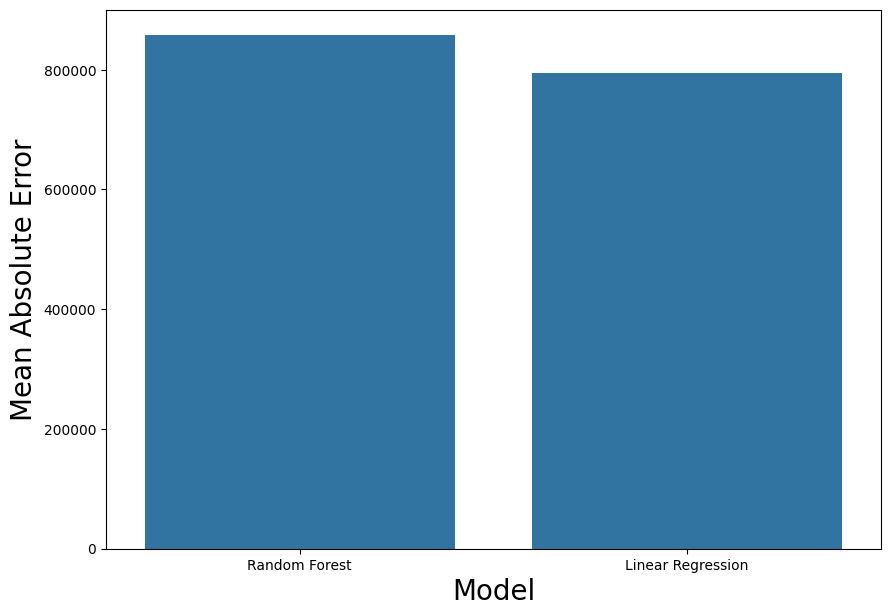

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression Evaluation
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
# Calculate MAE for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_pred)


# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
# Calculate MAE for Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_pred)


print("Linear Regression:")
print(f"MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}, MAE: {lr_mae:.4f}\n")

print("Random Forest Regressor:")
print(f"MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}, MAE: {rf_mae:.4f}")

# Best model based on higher R2
best_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
print(f"\nBest Model: {best_model}")

# Create a DataFrame to store MAE scores for plotting
mae_data = {'Model': ['Linear Regression', 'Random Forest'],
            'MAE Score': [lr_mae, rf_mae]}
mae = pd.DataFrame(mae_data)

# Now, sort and plot the 'mae' DataFrame
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

(vi) Basic Model Deployment UI (Optional Streamlit Interface)

In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

In [ ]:
# 2. Load your dataset
df = pd.read_csv("Housing.csv")

In [ ]:
# 3. Encode categorical (binary) columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
# Encode 'furnishingstatus'
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 0,
    'semi-furnished': 1,
    'unfurnished': 2
})

In [ ]:
# 4. Define features and target
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# 5. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
import joblib
joblib.dump(model, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
from google.colab import files
files.download("rf_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>